## The random walk expriment

We run the following experiment: we pick random noises until we find an image with score at least 0.95, and then make a random walk from this initial noise for *number_images_gif* steps.
We display the first *number_images_fig* images obtained in the first run of this experiment.

In [32]:
import sys
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import tensorflow as tf
from random import randint
from array2gif import write_gif
%matplotlib inline

digit = 8
noise_change = 0.2
number_images_gif = 160
number_images_fig = 16

classifier = tf.keras.models.load_model('/Models/classifier_capacity1_simple.model')
gan = tf.keras.models.load_model('/Models/gan_digit8_rich.h5')

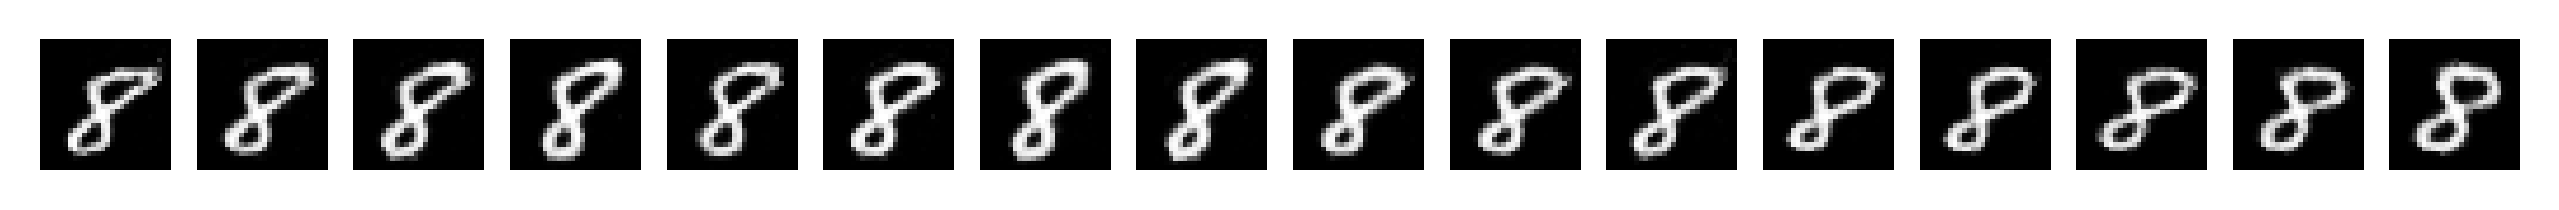

In [33]:
fig = plt.figure(figsize=(8, .5),dpi=400)

data = []
data_img = []
found = False
while(not found):
    noise = np.random.normal(0,1,size=[1,10])
    generated_image = gan.predict(noise)
    generated_image = generated_image.reshape(1,28,28,1)
    score = classifier.predict(generated_image)[0][digit]
    if(score > 0.95):
        found = True
        for j in range(number_images_gif):
            noise += np.random.normal(0,noise_change,size=[1,10]);
            noise = np.clip(noise,-1,1)
            generated_image = gan.predict(noise)
            data_img.append(generated_image)
            generated_image = generated_image[0].reshape(28,28)
            if(j < 2*number_images_fig and j%2 == 0) :
                fig.add_subplot(1,number_images_fig,j/2+1)
                plt.imshow(generated_image,cmap='gray')
                plt.axis("off")
            generated_image = generated_image*127.5 + 127.5
            generated_image = np.clip(generated_image,0,255)
            generated_image = generated_image[..., np.newaxis] * np.ones(3)
            generated_image = generated_image.astype('uint8')
            data.append(generated_image)
    plt.savefig('random_walk.png')
    write_gif(np.array(data), 'random_walk.gif', fps=10)
    plt.show()

We then plot prediction accuracy (of the image classifier) across the generated images.

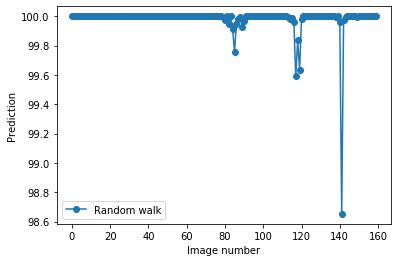

In [34]:
p = []
for i in range(number_images_gif):
	res = classifier.predict(data_img[i].reshape(1,28,28,1))
	p.append(res[0][digit]*100)

fig = plt.figure()
label = "Random walk"
plt.plot(np.arange(0,number_images_gif,1),p,'o-',label=label)
plt.ylabel('Prediction')
plt.xlabel('Image number')
plt.legend(loc='lower left')
plt.show()
fig.savefig('random_walk_predictions.png', dpi=200)